In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# The path to our CSV file
HDI_data = Path("HDR21-22_Composite_indices_complete_time_series.csv")

# Read our HDI data into pandas
HDI_df = pd.read_csv(HDI_data)
HDI_df.head()

,iso3,country,hdicode,region,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,...,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
0,AFG,Afghanistan,Low,SA,180.0,0.273,0.279,0.287,0.297,0.292,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,...,4.09,4.53,3.97,3.59,2.79,2.64,2.28,2.18,2.18,2.18
2,ALB,Albania,High,ECA,67.0,0.647,0.629,0.614,0.617,0.624,...,12.44,11.49,13.14,12.61,14.39,14.46,12.85,12.96,12.96,12.96
3,AND,Andorra,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,AS,26.0,0.728,0.739,0.742,0.748,0.755,...,49.56,49.68,55.49,59.76,64.95,75.61,65.97,68.95,68.95,68.95


In [3]:
# Get a list of all of our columns for easy reference
HDI_df.columns

Index(['iso3', 'country', 'hdicode', 'region', 'hdi_rank_2021', 'hdi_1990',
       'hdi_1991', 'hdi_1992', 'hdi_1993', 'hdi_1994',
       ...
       'mf_2012', 'mf_2013', 'mf_2014', 'mf_2015', 'mf_2016', 'mf_2017',
       'mf_2018', 'mf_2019', 'mf_2020', 'mf_2021'],
      dtype='object', length=1008)

In [4]:
# Extract the columns we are interested in analyzing for the HDI index table

HDI_index_df = HDI_df.loc[:, ['iso3', 'country', 'hdicode', "hdi_2011","hdi_2012",\
                                        "hdi_2013","hdi_2014","hdi_2015", "hdi_2016","hdi_2017","hdi_2018","hdi_2019","hdi_2020","hdi_2021"
                                        ]]                             

#Rename the column headers
HDI_titles= HDI_index_df.rename(columns = {'hdicode':'HDI_Code', }, inplace = True)

HDI_levels= HDI_index_df.iloc[195:199,]
HDI_regions= HDI_index_df.iloc[199:,]
HDI_countries=HDI_index_df.iloc[0:195,]

HDI_countries.dropna(inplace=True)

/var/folders/r1/l_chpxss1m9996z1bvjw88j40000gn/T/ipykernel_44393/1773424492.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HDI_countries.dropna(inplace=True)


In [5]:
#Remove columns that aren't needed in the levels and regions dataframes

HDI_levels_cleaned= HDI_levels.drop('HDI_Code',axis=1)
HDI_levels_cleaned.rename(columns = { 'country':'HDI_level', }, inplace = True)

HDI_regions_cleaned= HDI_regions.drop('HDI_Code', axis=1)
HDI_regions_cleaned.rename(columns = { 'country':'region', }, inplace = True)

HDI_levels_cleaned

,iso3,HDI_level,hdi_2011,hdi_2012,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021
195,ZZA.VHHD,Very high human development,0.872,0.875,0.881,0.886,0.889,0.892,0.895,0.898,0.902,0.895,0.896
196,ZZB.HHD,High human development,0.708,0.715,0.722,0.728,0.734,0.739,0.745,0.751,0.756,0.753,0.754
197,ZZC.MHD,Medium human development,0.594,0.602,0.609,0.618,0.627,0.636,0.640,0.643,0.645,0.642,0.636
198,ZZD.LHD,Low human development,0.484,0.489,0.495,0.501,0.506,0.510,0.514,0.518,0.522,0.519,0.518


In [6]:
# Export the HDI tables as CSV files.
HDI_countries.to_csv("csv tables/HDI_countries.csv", index=False)
HDI_regions_cleaned.to_csv("csv tables/HDI_regions.csv", index=False)
HDI_levels_cleaned.to_csv("csv tables/HDI_levels.csv", index=False)

In [7]:
# Extract the columns we are interested in analyzing for the life expectancy table

life_expectancy_df = HDI_df.loc[:,['iso3', 'country', 'hdicode',"le_2011","le_2012",\
                                        "le_2013","le_2014","le_2015", "le_2016","le_2017","le_2018","le_2019","le_2020","le_2021"
                                        ]]    

#Rename the column headers
Life_Expec_titles= life_expectancy_df.rename(columns = {'hdicode':'HDI_Code' }, inplace = True)    

le_levels= life_expectancy_df.iloc[195:199,]
le_regions= life_expectancy_df.iloc[199:206,]
le_countries=life_expectancy_df.iloc[0:195,]
                               
le_levels

,iso3,country,HDI_Code,le_2011,le_2012,le_2013,le_2014,le_2015,le_2016,le_2017,le_2018,le_2019,le_2020,le_2021
195,ZZA.VHHD,Very high human development,NaN,78.365321,78.578754,78.822196,79.057616,79.062435,79.264933,79.428843,79.582768,79.822662,78.789745,78.521301
196,ZZB.HHD,High human development,NaN,73.940875,74.212238,74.463776,74.732246,74.944071,75.152677,75.261530,75.600606,75.785826,75.120548,74.709094
197,ZZC.MHD,Medium human development,NaN,67.047468,67.460860,67.893291,68.411503,68.895967,69.314997,69.694263,69.998178,70.219458,69.517580,67.438318
198,ZZD.LHD,Low human development,NaN,59.180994,59.569566,60.010001,60.326771,60.657080,61.064843,61.424061,61.721181,62.083426,61.675690,61.310991


In [8]:
#Remove columns that aren't needed in the levels and regions dataframes

le_levels_cleaned= le_levels.drop('HDI_Code',axis=1)
le_levels_cleaned.rename(columns = { 'country':'HDI_level', }, inplace = True)

le_regions_cleaned= le_regions.drop('HDI_Code', axis=1)
le_regions_cleaned.rename(columns = { 'country':'region', }, inplace = True)

le_levels_cleaned

,iso3,HDI_level,le_2011,le_2012,le_2013,le_2014,le_2015,le_2016,le_2017,le_2018,le_2019,le_2020,le_2021
195,ZZA.VHHD,Very high human development,78.365321,78.578754,78.822196,79.057616,79.062435,79.264933,79.428843,79.582768,79.822662,78.789745,78.521301
196,ZZB.HHD,High human development,73.940875,74.212238,74.463776,74.732246,74.944071,75.152677,75.261530,75.600606,75.785826,75.120548,74.709094
197,ZZC.MHD,Medium human development,67.047468,67.460860,67.893291,68.411503,68.895967,69.314997,69.694263,69.998178,70.219458,69.517580,67.438318
198,ZZD.LHD,Low human development,59.180994,59.569566,60.010001,60.326771,60.657080,61.064843,61.424061,61.721181,62.083426,61.675690,61.310991


In [9]:
# Export the life expectancy tables as CSV files.
le_countries.to_csv("csv tables/le_countries.csv", index=False)
le_regions_cleaned.to_csv("csv tables/le_regions.csv", index=False)
le_levels_cleaned.to_csv("csv tables/le_levels.csv", index=False)

In [10]:
# Extract the columns we are interested in analyzing for the expected number of school years table
expected_school_years_df = HDI_df.loc[:,['iso3', 'country', 'hdicode', "eys_2011","eys_2012",\
                                        "eys_2013","eys_2014","eys_2015", "eys_2016","eys_2017","eys_2018","eys_2019","eys_2020","eys_2021"
                                        ]]  
#Rename the column headers
eys_titles= expected_school_years_df.rename(columns = {'hdicode':'HDI_Code' }, inplace = True)    

eys_levels= expected_school_years_df.iloc[195:199,]
eys_regions= expected_school_years_df.iloc[199:206,]
eys_countries=expected_school_years_df.iloc[0:195,]

eys_countries.dropna(inplace=True)
eys_countries

/var/folders/r1/l_chpxss1m9996z1bvjw88j40000gn/T/ipykernel_44393/2436733463.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eys_countries.dropna(inplace=True)


,iso3,country,HDI_Code,eys_2011,eys_2012,eys_2013,eys_2014,eys_2015,eys_2016,eys_2017,eys_2018,eys_2019,eys_2020,eys_2021
0,AFG,Afghanistan,Low,9.278810,9.577323,9.875836,10.174350,10.180150,10.185950,10.191750,10.197550,10.263844,10.263844,10.263844
1,AGO,Angola,Medium,9.560080,10.082500,10.604900,11.127300,11.649700,12.172090,12.172100,12.172100,12.172100,12.172100,12.172100
2,ALB,Albania,High,13.748450,14.586650,14.925640,15.252420,15.076300,14.804600,14.816130,14.695620,14.818920,14.448000,14.448000
3,AND,Andorra,Very High,11.671920,13.524016,13.138841,13.495076,13.140280,13.300239,13.046476,13.300239,13.300239,13.300239,13.300239
4,ARE,United Arab Emirates,Very High,12.827039,12.945893,13.064747,13.183602,13.302456,13.421310,14.344100,15.019120,15.694140,15.717690,15.717690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,High,12.232240,12.252976,12.273711,12.294447,12.315182,12.335918,12.356653,12.377389,12.398124,12.418859,12.418859
191,YEM,Yemen,Low,9.098710,9.098710,9.098710,9.098710,9.098710,9.098710,9.098710,9.098710,9.098710,9.098710,9.098710
192,ZAF,South Africa,High,13.464115,13.497650,13.748780,13.999910,14.008785,14.017660,13.791200,13.535310,13.643710,13.643710,13.643710
193,ZMB,Zambia,Medium,10.925603,10.925998,10.926392,10.926787,10.927182,10.927576,10.927971,10.928366,10.928760,10.928760,10.928760


In [11]:
#Remove columns that aren't needed in the levels and regions dataframes

eys_levels_cleaned= eys_levels.drop('HDI_Code',axis=1)
eys_levels_cleaned.rename(columns = { 'country':'HDI_level', }, inplace = True)

eys_regions_cleaned= eys_regions.drop('HDI_Code', axis=1)
eys_regions_cleaned.rename(columns = { 'country':'region', }, inplace = True)

eys_regions_cleaned

,iso3,region,eys_2011,eys_2012,eys_2013,eys_2014,eys_2015,eys_2016,eys_2017,eys_2018,eys_2019,eys_2020,eys_2021
199,ZZE.AS,Arab States,11.578050,11.811017,11.722879,11.779658,11.902077,12.017712,12.090033,12.221818,12.352035,12.366566,12.353535
200,ZZF.EAP,East Asia and the Pacific,12.451746,12.653346,12.816409,13.053302,13.240658,13.379431,13.564312,13.670623,13.844319,13.818432,13.816818
201,ZZG.ECA,Europe and Central Asia,13.569700,13.711788,14.471022,14.684491,14.864545,15.053858,15.215847,15.325361,15.448650,15.455550,15.446546
202,ZZH.LAC,Latin America and the Caribbean,13.755854,13.809491,14.350104,14.432253,14.482245,14.628358,14.654710,14.754893,14.777329,14.770758,14.767956
203,ZZI.SA,South Asia,10.665025,10.919139,10.963109,11.256614,11.380238,11.731247,11.616882,11.455094,11.279929,11.568208,11.562208
204,ZZJ.SSA,Sub-Saharan Africa,9.460569,9.546207,9.690278,9.793646,9.894703,9.981369,10.038363,10.132258,10.253713,10.272845,10.267338
205,ZZK.WORLD,World,11.958706,12.106047,12.258803,12.419588,12.526893,12.690418,12.708571,12.712662,12.731804,12.798925,12.780907


In [12]:
# Export the life expectancy tables as CSV files.
eys_countries.to_csv("csv tables/eys_countries.csv", index=False)
eys_regions_cleaned.to_csv("csv tables/eys_regions.csv", index=False)
eys_levels_cleaned.to_csv("csv tables/eys_levels.csv", index=False)

In [13]:
# Extract the columns we are interested in analyzing for the mean number of school years table
                                                      
mean_school_years_df = HDI_df.loc[:,['iso3', 'country', 'hdicode',"mys_2011","mys_2012",\
                                        "mys_2013","mys_2014","mys_2015", "mys_2016","mys_2017","mys_2018","mys_2019","mys_2020","mys_2021"
                                        ]] 

#Rename the column headers
mys_titles= mean_school_years_df.rename(columns = {'hdicode':'HDI_Code' }, inplace = True) 

mys_levels= mean_school_years_df.iloc[195:199,]
mys_regions= mean_school_years_df.iloc[199:206,]
mys_countries=mean_school_years_df.iloc[0:195,]

mys_countries.dropna(inplace=True)                               
mys_countries


/var/folders/r1/l_chpxss1m9996z1bvjw88j40000gn/T/ipykernel_44393/699442174.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mys_countries.dropna(inplace=True)


,iso3,country,HDI_Code,mys_2011,mys_2012,mys_2013,mys_2014,mys_2015,mys_2016,mys_2017,mys_2018,mys_2019,mys_2020,mys_2021
0,AFG,Afghanistan,Low,2.157332,2.209473,2.261614,2.313755,2.365896,2.463660,2.561425,2.659189,2.756953,2.854718,2.985070
1,AGO,Angola,Medium,3.869118,3.909642,3.950166,3.990690,4.704040,5.417391,5.417391,5.417391,5.417391,5.417391,5.417391
2,ALB,Albania,High,9.801700,10.025110,10.196281,10.370374,10.547439,10.727528,10.910692,11.096983,11.286455,11.286455,11.286455
3,AND,Andorra,Very High,10.558107,10.587085,10.616062,10.645040,10.573280,10.556100,10.555773,10.555446,10.555120,10.555120,10.555120
4,ARE,United Arab Emirates,Very High,10.001802,10.169965,10.338129,10.506293,10.674456,10.842620,12.055400,12.484000,12.694030,12.694030,12.694030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,High,11.679870,11.649195,11.618521,11.587846,11.557172,11.526498,11.495823,11.465149,11.434474,11.403800,11.403800
191,YEM,Yemen,Low,2.800000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.200000,3.200000,3.200000,3.200000
192,ZAF,South Africa,High,9.693720,9.934320,10.040185,10.146050,10.233580,10.187880,10.142180,10.757670,11.373160,11.373160,11.373160
193,ZMB,Zambia,Medium,6.390441,6.461297,6.532153,6.603009,6.673865,6.802171,6.930478,7.058785,7.187091,7.187091,7.187091


In [14]:
#Remove columns that aren't needed in the levels and regions dataframes

mys_levels_cleaned= mys_levels.drop('HDI_Code',axis=1)
mys_levels_cleaned.rename(columns = { 'country':'HDI_level', }, inplace = True)

mys_regions_cleaned= mys_regions.drop('HDI_Code', axis=1)
mys_regions_cleaned.rename(columns = { 'country':'region', }, inplace = True)

mys_regions_cleaned

,iso3,region,mys_2011,mys_2012,mys_2013,mys_2014,mys_2015,mys_2016,mys_2017,mys_2018,mys_2019,mys_2020,mys_2021
199,ZZE.AS,Arab States,6.845942,7.020724,7.188494,7.305266,7.425236,7.549883,7.707405,7.872166,8.014022,8.044062,8.028550
200,ZZF.EAP,East Asia and the Pacific,7.032914,7.130260,7.228009,7.317599,7.409796,7.497074,7.583667,7.687781,7.814256,7.837973,7.839329
201,ZZG.ECA,Europe and Central Asia,9.949724,10.012632,10.075952,10.147717,10.209872,10.312125,10.383680,10.464875,10.558592,10.560785,10.553922
202,ZZH.LAC,Latin America and the Caribbean,7.929881,8.107920,8.175572,8.277193,8.392843,8.563354,8.686376,8.823468,8.961853,9.002488,8.997700
203,ZZI.SA,South Asia,5.478807,5.679543,5.860110,6.072120,6.322118,6.416901,6.509208,6.575295,6.643786,6.713272,6.710321
204,ZZJ.SSA,Sub-Saharan Africa,5.014953,5.120678,5.232873,5.330749,5.458183,5.593757,5.703195,5.871269,6.022655,6.013024,6.001639
205,ZZK.WORLD,World,7.872439,7.981302,8.069451,8.166999,8.278372,8.360727,8.439513,8.520606,8.612013,8.635057,8.617461


In [15]:
# Export the life expectancy tables as CSV files.
mys_countries.to_csv("csv tables/mys_countries.csv", index=False)
mys_regions_cleaned.to_csv("csv tables/mys_regions.csv", index=False)
mys_levels_cleaned.to_csv("csv tables/mys_levels.csv", index=False)

In [16]:
# Extract the columns we are interested in analyzing for the Gross National Income (Per Capita) table                        
                               
GNI_df = HDI_df.loc[:,['iso3', 'country', 'hdicode',"gnipc_2011","gnipc_2012", "gnipc_2013","gnipc_2014","gnipc_2015", "gnipc_2016",\
                                        "gnipc_2017","gnipc_2018","gnipc_2019","gnipc_2020","gnipc_2021"
                                        ]]  
#Rename the column headers
GNI_titles= GNI_df.rename(columns = {'hdicode':'HDI_Code' }, inplace = True) 

GNI_levels= GNI_df.iloc[195:199,]
GNI_regions= GNI_df.iloc[199:206,]
GNI_countries=GNI_df.iloc[0:195,]

GNI_countries.dropna(inplace=True)                               
GNI_countries


/var/folders/r1/l_chpxss1m9996z1bvjw88j40000gn/T/ipykernel_44393/61297628.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GNI_countries.dropna(inplace=True)


,iso3,country,HDI_Code,gnipc_2011,gnipc_2012,gnipc_2013,gnipc_2014,gnipc_2015,gnipc_2016,gnipc_2017,gnipc_2018,gnipc_2019,gnipc_2020,gnipc_2021
0,AFG,Afghanistan,Low,1999.653042,2125.862821,2193.553936,2178.507021,2101.589319,2077.566899,2085.487571,2054.939895,2097.889450,1997.852149,1824.190915
1,AGO,Angola,Medium,6885.536390,7280.845666,7478.104777,7704.231949,7652.656486,7189.426672,6861.575738,6381.521946,6082.746624,5593.142060,5465.617791
2,ALB,Albania,High,11056.645170,11146.263030,11552.982470,11691.648290,12016.297600,12484.624200,12802.148310,13302.705960,13485.311240,12996.762910,14131.110390
3,AND,Andorra,Very High,48812.029030,47126.814610,46385.095200,48483.720320,49936.874540,52267.738320,52650.225760,53483.306630,54465.047400,47878.666640,51166.626610
4,ARE,United Arab Emirates,Very High,56152.064670,57445.954750,60005.695360,62573.505310,65577.512240,66881.329740,67667.508460,67195.095230,68590.900940,63016.401220,62573.591810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,High,5959.794044,5683.651395,5675.889504,5757.486050,6222.783552,6401.830980,6287.673021,6280.573936,6356.988690,5812.868328,5307.953374
191,YEM,Yemen,Low,3161.129536,3152.900024,3212.651579,2775.842952,1785.788608,1494.230811,1302.425254,1341.656234,1349.567046,1370.601082,1314.270189
192,ZAF,South Africa,High,13514.303610,13602.253520,13732.252520,13700.834560,13694.728110,13545.358590,13475.988210,13491.221790,13366.474640,12449.671040,12948.373250
193,ZMB,Zambia,Medium,2873.031079,3333.576512,3389.478940,3263.039162,3403.471444,3237.505650,3330.552717,3418.096158,3365.410652,3178.619722,3217.767739


In [17]:
#Remove columns that aren't needed in the levels and regions dataframes

GNI_levels_cleaned= GNI_levels.drop('HDI_Code',axis=1)
GNI_levels_cleaned.rename(columns = { 'country':'HDI_level', }, inplace = True)

GNI_regions_cleaned= GNI_regions.drop('HDI_Code', axis=1)
GNI_regions_cleaned.rename(columns = { 'country':'region', }, inplace = True)

GNI_regions_cleaned

,iso3,region,gnipc_2011,gnipc_2012,gnipc_2013,gnipc_2014,gnipc_2015,gnipc_2016,gnipc_2017,gnipc_2018,gnipc_2019,gnipc_2020,gnipc_2021
199,ZZE.AS,Arab States,14045.853070,14143.874800,14045.001300,14057.156090,14258.538410,14442.675530,14286.291330,14294.546710,14257.787380,13360.970990,13500.556150
200,ZZF.EAP,East Asia and the Pacific,9357.723849,9991.529671,10546.687820,11238.994920,11805.220660,12462.294840,13202.097320,13904.115010,14621.334280,14622.636100,15580.436860
201,ZZG.ECA,Europe and Central Asia,14627.696450,15161.409430,15938.934860,16281.686290,16663.665280,16729.093930,17400.712950,17861.288800,18027.109590,18031.677820,19351.837020
202,ZZH.LAC,Latin America and the Caribbean,14908.241600,15182.341940,15491.849890,15516.666970,15441.823600,15116.509200,15126.067180,15057.394300,14895.531640,13727.003200,14520.661240
203,ZZI.SA,South Asia,4635.989136,4741.289840,4923.642694,5183.331005,5449.187212,5789.022974,6116.711799,6355.589677,6471.972919,6077.350961,6481.393135
204,ZZJ.SSA,Sub-Saharan Africa,3482.800168,3551.647275,3639.137221,3763.856396,3803.834306,3772.922733,3754.362823,3755.151307,3778.105787,3629.618138,3698.868914
205,ZZK.WORLD,World,14069.219100,14356.941280,14627.803080,14985.568050,15326.548030,15614.118750,16022.410060,16372.224530,16652.533510,15963.888970,16752.082920


In [18]:
# Export the GNI tables as CSV files.
GNI_countries.to_csv("csv tables/GNI_countries.csv", index=False)
GNI_regions_cleaned.to_csv("csv tables/GNI_regions.csv", index=False)
GNI_levels_cleaned.to_csv("csv tables/GNI_levels.csv", index=False)

In [19]:
# Extract the columns we are interested in analyzing for the IHDI table for year 2021 only

                               
IHDI_df = HDI_df.loc[:,['iso3', 'country', 'hdicode','ihdi_2021', 'coef_ineq_2021','loss_2021','ineq_le_2021','ineq_edu_2021','ineq_inc_2021'
                                        ]]  

IHDI_Renamed_df = IHDI_df.rename(columns= {"hdicode": "HDI_Code", "coef_ineq_2021": "Coefficient_of_Human Inequality",
                    'loss_2021':'Overall loss (%)','ineq_le_2021': 'Inequality_in_life_expectancy(%)','ineq_edu_2021': 'Inequality_in_eduation(%)',
                    'ineq_inc_2021':'Inequality_in_income(%)'
                                     })

IHDI_levels= IHDI_Renamed_df.iloc[195:199,]
IHDI_regions= IHDI_Renamed_df.iloc[199:206,]
IHDI_countries=IHDI_Renamed_df.iloc[0:195,]
                               
IHDI_countries


,iso3,country,HDI_Code,ihdi_2021,Coefficient_of_Human Inequality,Overall loss (%),Inequality_in_life_expectancy(%),Inequality_in_eduation(%),Inequality_in_income(%)
0,AFG,Afghanistan,Low,NaN,NaN,NaN,26.165367,45.365170,NaN
1,AGO,Angola,Medium,0.407,30.412168,30.546075,28.187733,34.171440,28.87733
2,ALB,Albania,High,0.710,10.767685,10.804020,6.790635,12.333440,13.17898
3,AND,Andorra,Very High,NaN,NaN,NaN,5.297910,10.008154,NaN
4,ARE,United Arab Emirates,Very High,NaN,NaN,NaN,4.524926,12.634355,NaN
...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,High,0.613,13.106588,13.295615,10.419724,7.029960,21.87008
191,YEM,Yemen,Low,0.307,31.543484,32.527473,26.689573,46.137650,21.80323
192,ZAF,South Africa,High,0.471,31.051127,33.941094,18.863251,17.294130,56.99600
193,ZMB,Zambia,Medium,0.390,30.109645,30.973451,25.052994,20.435720,44.84022


In [20]:
#Remove columns that aren't needed in the levels and regions dataframes

IHDI_levels_cleaned= IHDI_levels.drop('HDI_Code',axis=1)
IHDI_levels_cleaned.rename(columns = { 'country':'HDI_level', }, inplace = True)

IHDI_regions_cleaned= IHDI_regions.drop('HDI_Code', axis=1)
IHDI_regions_cleaned.rename(columns = { 'country':'region', }, inplace = True)

IHDI_regions_cleaned

,iso3,region,ihdi_2021,Coefficient_of_Human Inequality,Overall loss (%),Inequality_in_life_expectancy(%),Inequality_in_eduation(%),Inequality_in_income(%)
199,ZZE.AS,Arab States,0.534,24.188601,24.576271,14.114357,33.130224,25.321222
200,ZZF.EAP,East Asia and the Pacific,0.630,15.537360,15.887850,7.880201,13.361987,25.369893
201,ZZG.ECA,Europe and Central Asia,0.714,10.277559,10.301508,7.317009,6.966866,16.548802
202,ZZH.LAC,Latin America and the Caribbean,0.601,19.608799,20.291777,10.093223,14.802601,33.930573
203,ZZI.SA,South Asia,0.476,24.251594,24.683544,17.637374,36.242215,18.875191
204,ZZJ.SSA,Sub-Saharan Africa,0.383,29.903424,29.981718,28.309306,34.266790,27.134176
205,ZZK.WORLD,World,0.590,19.358854,19.398907,13.182837,21.693417,23.200307


In [21]:
# Export the IHDI tables as CSV files.
IHDI_countries.to_csv("csv tables/IHDI_countries.csv", index=False)
IHDI_regions_cleaned.to_csv("csv tables/IHDI_regions.csv", index=False)
IHDI_levels_cleaned.to_csv("csv tables/IHDI_levels.csv", index=False)

In [22]:
# Extract the columns we are interested in analyzing for the GII table for 2021 only   

GII_df = HDI_df.loc[:,['iso3', 'country', 'hdicode', 'gii_rank_2021', 'gii_2021', 'mmr_2021', 'abr_2021',\
                    'se_f_2021', 'se_m_2021', 'pr_f_2021','pr_m_2021','lfpr_f_2021','lfpr_m_2021'
                                        ]]  

GII_Renamed_df= GII_df.rename(columns= {'hdicode': 'HDI_Code', 'gii_rank_2021': "GII_Rank", 'gii_2021': 'Gender Inequality Index',
                                        'mmr_2021': 'Maternal Mortality Ratio (deaths per 100,000 live births)',
                                        'abr_2021': 'Adolescent Birth Rate (births per 1,000 women ages 15-19)',
                                        'se_f_2021': 'Population with at least some secondary education, female (% ages 25 and older)',
                                        'se_m_2021': 'Population with at least some secondary education, male (% ages 25 and older)',
                                        'pr_f_2021': 'Share of seats in parliament, female (% held by women)',
                                        'pr_m_2021': 'Share of seats in parliament, male (% held by men)',
                                        'lfpr_f_2021': 'Labour force participation rate, female (% ages 15 and older)',
                                        'lfpr_m_2021': 'Labour force participation rate, male (% ages 15 and older'})

GII_levels= GII_Renamed_df.iloc[195:199,]
GII_regions= GII_Renamed_df.iloc[199:206,]
GII_countries=GII_Renamed_df.iloc[0:195,]
                               
GII_countries


,iso3,country,HDI_Code,GII_Rank,Gender Inequality Index,"Maternal Mortality Ratio (deaths per 100,000 live births)","Adolescent Birth Rate (births per 1,000 women ages 15-19)","Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Share of seats in parliament, female (% held by women)","Share of seats in parliament, male (% held by men)","Labour force participation rate, female (% ages 15 and older)","Labour force participation rate, male (% ages 15 and older"
0,AFG,Afghanistan,Low,167.0,0.678,638.0,82.565,6.395730,14.865710,27.215190,72.784810,14.848,66.515
1,AGO,Angola,Medium,136.0,0.537,241.0,138.402,28.163900,51.546170,29.545455,70.454545,73.968,79.071
2,ALB,Albania,High,39.0,0.144,15.0,14.517,95.387505,93.038415,35.714286,64.285714,50.733,66.154
3,AND,Andorra,Very High,NaN,NaN,NaN,5.887,70.665854,72.422097,46.428571,53.571429,NaN,NaN
4,ARE,United Arab Emirates,Very High,11.0,0.049,3.0,3.085,81.997002,85.596741,50.000000,50.000000,46.542,88.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,High,99.0,0.418,43.0,43.589,79.127486,71.582922,7.843137,92.156863,30.700,54.237
191,YEM,Yemen,Low,170.0,0.820,164.0,54.404,22.440000,37.520000,0.294118,99.705882,5.995,67.637
192,ZAF,South Africa,High,97.0,0.405,119.0,61.206,68.897713,87.666222,45.982143,54.017857,46.212,59.883
193,ZMB,Zambia,Medium,138.0,0.540,213.0,117.017,47.104201,56.811897,15.060241,84.939759,69.230,77.847


In [23]:
#Remove columns that aren't needed in the levels and regions dataframes

GII_levels_cleaned= GII_levels.drop('HDI_Code',axis=1)
GII_levels_cleaned= GII_levels_cleaned.drop('GII_Rank',axis=1)
GII_levels_cleaned.rename(columns = { 'country':'HDI_level', }, inplace = True)

GII_regions_cleaned= GII_regions.drop('HDI_Code', axis=1)
GII_regions_cleaned= GII_regions_cleaned.drop('GII_Rank', axis=1)
GII_regions_cleaned.rename(columns = { 'country':'region', }, inplace = True)

GII_regions_cleaned

,iso3,region,Gender Inequality Index,"Maternal Mortality Ratio (deaths per 100,000 live births)","Adolescent Birth Rate (births per 1,000 women ages 15-19)","Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Share of seats in parliament, female (% held by women)","Share of seats in parliament, male (% held by men)","Labour force participation rate, female (% ages 15 and older)","Labour force participation rate, male (% ages 15 and older"
199,ZZE.AS,Arab States,0.536,150.280829,45.253766,53.812798,60.443281,18.333665,81.666335,19.328712,69.466018
200,ZZF.EAP,East Asia and the Pacific,0.337,81.933029,21.580682,71.432005,78.217123,20.930270,79.069730,59.704198,75.209126
201,ZZG.ECA,Europe and Central Asia,0.227,20.275766,20.131623,83.352395,89.748839,26.070039,73.929961,42.926377,67.038752
202,ZZH.LAC,Latin America and the Caribbean,0.381,75.030838,53.389333,63.160863,63.171381,33.200637,66.799363,48.630181,72.656571
203,ZZI.SA,South Asia,0.508,153.268313,28.937075,42.188378,52.817241,17.577855,82.422145,21.594128,71.585599
204,ZZJ.SSA,Sub-Saharan Africa,0.569,535.658813,100.877877,31.147249,44.269573,25.715752,74.284248,62.144428,72.253662
205,ZZK.WORLD,World,0.465,225.406503,42.529066,64.154258,70.316516,25.913372,74.086628,46.200447,71.691740


In [24]:
# Export the GII tables as CSV files.
GII_countries.to_csv("csv tables/GII_countries.csv", index=False)
GII_regions_cleaned.to_csv("csv tables/GII_regions.csv", index=False)
GII_levels_cleaned.to_csv("csv tables/GII_levels.csv", index=False)

In [25]:
# Extract the columns we are interested in analyzing for the HDI index table

IHDI_index_df = HDI_df.loc[:, ['iso3', 'country', 'hdicode', "ihdi_2011","ihdi_2012",\
                                        "ihdi_2013","ihdi_2014","ihdi_2015", "ihdi_2016","ihdi_2017","ihdi_2018","ihdi_2019","ihdi_2020","ihdi_2021"
                                        ]]                             


IHDI_index_levels= IHDI_index_df.iloc[195:199,]
IHDI_index_regions= IHDI_index_df.iloc[199:206,]
IHDI_index_countries= IHDI_index_df.iloc[0:195,]

IHDI_index_countries

,iso3,country,hdicode,ihdi_2011,ihdi_2012,ihdi_2013,ihdi_2014,ihdi_2015,ihdi_2016,ihdi_2017,ihdi_2018,ihdi_2019,ihdi_2020,ihdi_2021
0,AFG,Afghanistan,Low,0.315,0.323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGO,Angola,Medium,NaN,NaN,NaN,NaN,0.395,0.407,0.409,0.410,0.410,0.409,0.407
2,ALB,Albania,High,0.669,0.696,0.704,0.711,0.714,0.717,0.720,0.720,0.724,0.709,0.710
3,AND,Andorra,Very High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.617,0.613
191,YEM,Yemen,Low,0.343,0.345,0.349,0.343,0.323,0.316,0.311,0.310,0.311,0.312,0.307
192,ZAF,South Africa,High,NaN,0.465,0.470,0.476,0.479,0.477,0.477,0.479,0.485,0.485,0.471
193,ZMB,Zambia,Medium,0.359,0.369,0.375,0.368,0.372,0.374,0.377,0.391,0.393,0.391,0.390


In [26]:
#Remove columns that aren't needed in the levels and regions dataframes

IHDI_level_index_cleaned= IHDI_index_levels.drop('hdicode', axis=1)
IHDI_level_index_cleaned.rename(columns = { 'country':'HDI_level', }, inplace = True)

IHDI_regions_index_cleaned= IHDI_index_regions.drop('hdicode', axis=1)
IHDI_regions_index_cleaned.rename(columns = { 'country':'region', }, inplace = True)

IHDI_level_index_cleaned

,iso3,HDI_level,ihdi_2011,ihdi_2012,ihdi_2013,ihdi_2014,ihdi_2015,ihdi_2016,ihdi_2017,ihdi_2018,ihdi_2019,ihdi_2020,ihdi_2021
195,ZZA.VHHD,Very high human development,0.776,0.780,0.786,0.787,0.791,0.795,0.798,0.802,0.807,0.804,0.805
196,ZZB.HHD,High human development,0.580,0.591,0.593,0.599,0.605,0.611,0.616,0.622,0.627,0.626,0.627
197,ZZC.MHD,Medium human development,0.427,0.435,0.441,0.452,0.466,0.473,0.477,0.482,0.486,0.485,0.481
198,ZZD.LHD,Low human development,0.327,0.331,0.336,0.341,0.344,0.349,0.352,0.355,0.359,0.359,0.359


In [27]:
# Export the IHDI tables as CSV files.
IHDI_index_countries.to_csv("csv tables/IHDI_index_countries.csv", index=False)
IHDI_regions_cleaned.to_csv("csv tables/IHDI_regions_index.csv", index=False)
IHDI_levels_cleaned.to_csv("csv tables/IHDI_levels_index.csv", index=False)

In [28]:
# Extract the columns we are interested in analyzing for the HDI index table

gender_GDI_df = HDI_df.loc[:, ['iso3', 'country', 'gdi_group_2021', 'gdi_2021', 'hdi_f_2021', 'le_f_2021', 'eys_f_2021',\
                                'mys_f_2021', 'gni_pc_f_2021','hdi_m_2021', 'le_m_2021', 'eys_m_2021',\
                                'mys_m_2021', 'gni_pc_m_2021'                                      ]]                             

#Rename the column headers
Gender_GDI= gender_GDI_df.rename(columns = {                                           
    'gdi_group_2021': 'GDI_Group',
	'gdi_2021' :'Gender Development Index (value)'	,
	'hdi_f_2021': 'HDI female',
    'le_f_2021' : 'Life Expectancy at Birth, female (years)',
	'eys_f_2021' : 'Expected Years of Schooling, female (years)',
	'mys_f_2021': 'Mean Years of Schooling, female (years)',
	'gni_pc_f_2021': 'Gross National Income Per Capita, female (2017 PPP$)',
	'hdi_m_2021' : 'HDI male',
	'le_m_2021': 'Life Expectancy at Birth, male (years)',
    'eys_m_2021': 'Expected Years of Schooling, male (years)',	
	'mys_m_2021': 'Mean Years of Schooling, male (years)',
    'gni_pc_m_2021': 'Gross National Income Per Capita, male (2017 PPP$)'
                                             }, inplace = True)

gender_levels= gender_GDI_df.iloc[195:199,]
gender_regions= gender_GDI_df.iloc[199:206,]
gender_countries= gender_GDI_df.iloc[0:195,]

gender_levels

,iso3,country,GDI_Group,Gender Development Index (value),HDI female,"Life Expectancy at Birth, female (years)","Expected Years of Schooling, female (years)","Mean Years of Schooling, female (years)","Gross National Income Per Capita, female (2017 PPP$)",HDI male,"Life Expectancy at Birth, male (years)","Expected Years of Schooling, male (years)","Mean Years of Schooling, male (years)","Gross National Income Per Capita, male (2017 PPP$)"
195,ZZA.VHHD,Very high human development,NaN,0.986,0.888622,81.608231,16.885169,12.240306,33849.413110,0.901088,75.556976,16.147255,12.410001,53887.160750
196,ZZB.HHD,High human development,NaN,0.973,0.742402,77.693402,14.587980,8.130882,11187.223590,0.762761,71.913175,13.847510,8.507729,19089.439150
197,ZZC.MHD,Medium human development,NaN,0.880,0.586242,69.386887,11.992916,6.459155,2912.272279,0.666038,65.648410,11.905646,7.407130,9668.208376
198,ZZD.LHD,Low human development,NaN,0.864,0.476586,63.425578,9.030996,4.056868,1906.654629,0.551873,59.301005,9.920016,5.704288,4107.402834


In [29]:
#Remove columns that aren't needed in the levels and regions dataframes

gender_level_cleaned= gender_levels.drop("GDI_Group", axis=1)
gender_level_cleaned.rename(columns = { 'country':'HDI_level', }, inplace = True)

gender_regions_cleaned= gender_regions.drop("GDI_Group", axis=1)
gender_regions_cleaned.rename(columns = { 'country':'region', }, inplace = True)

gender_regions_cleaned

,iso3,region,Gender Development Index (value),HDI female,"Life Expectancy at Birth, female (years)","Expected Years of Schooling, female (years)","Mean Years of Schooling, female (years)","Gross National Income Per Capita, female (2017 PPP$)",HDI male,"Life Expectancy at Birth, male (years)","Expected Years of Schooling, male (years)","Mean Years of Schooling, male (years)","Gross National Income Per Capita, male (2017 PPP$)"
199,ZZE.AS,Arab States,0.871,0.645356,73.078905,12.236459,7.576193,4745.350103,0.740662,68.906606,12.478279,8.572364,21666.663580
200,ZZF.EAP,East Asia and the Pacific,0.978,0.740122,78.479168,14.186335,7.587781,12357.404760,0.756498,72.863932,13.442985,8.092732,18711.344730
201,ZZG.ECA,Europe and Central Asia,0.961,0.778131,76.427995,15.311862,10.351608,13162.180910,0.809559,69.394808,15.584555,10.775279,25834.474760
202,ZZH.LAC,Latin America and the Caribbean,0.986,0.746796,75.646671,15.164855,9.026251,10667.406800,0.757133,68.761084,14.370557,8.965192,18485.720550
203,ZZI.SA,South Asia,0.852,0.568257,69.760419,11.512010,6.279472,2351.804366,0.666616,66.126503,11.606740,7.251328,10425.549080
204,ZZJ.SSA,Sub-Saharan Africa,0.907,0.519216,62.124062,10.012814,5.103810,2969.613374,0.572139,58.158274,10.572173,6.876032,4429.390375
205,ZZK.WORLD,World,0.958,0.715015,73.978842,12.851884,8.358083,12241.224180,0.746639,68.912899,12.714705,8.913211,21210.277680


In [30]:
# Export the IHDI tables as CSV files.
gender_countries.to_csv("csv tables/gender_countries.csv", index=False)
gender_regions_cleaned.to_csv("csv tables/gender_regions.csv", index=False)
gender_level_cleaned.to_csv("csv tables/gender_levels.csv", index=False)

In [31]:
# Extract the columns we are interested in analyzing for the HDI 2021 table

HDI_2021_df = HDI_df.loc[:, ['iso3', 'country','region', 'hdicode', 'hdi_rank_2021', "hdi_2021","le_2021",\
                                        "eys_2021","mys_2021","gnipc_2021"
                                        ]]                             

#Rename the column headers
HDI_2021_titles= HDI_2021_df.rename(columns = {
                                                'hdicode':'HDI_Code',
                                                'hdi_rank_2021':'HDI_Rank',
                                                'hdi_2021': 'Human Development Index 2021',
                                                'le_2021': 'Life Expectancy at Birth',
                                                'eys_2021':'Expected Years of Schooling',
                                                'mys_2021': 'Mean Years of Schooling',
                                                'gnipc_2021': 'Gross National Income Per Capita'
                                                    }, inplace = True)

HDI_2021_levels= HDI_2021_df.iloc[195:199,]
HDI_2021_regions= HDI_2021_df.iloc[199:206,]
HDI_2021_countries= HDI_2021_df.iloc[0:195,]

HDI_2021_countries

,iso3,country,region,HDI_Code,HDI_Rank,Human Development Index 2021,Life Expectancy at Birth,Expected Years of Schooling,Mean Years of Schooling,Gross National Income Per Capita
0,AFG,Afghanistan,SA,Low,180.0,0.478,61.9824,10.263844,2.985070,1824.190915
1,AGO,Angola,SSA,Medium,148.0,0.586,61.6434,12.172100,5.417391,5465.617791
2,ALB,Albania,ECA,High,67.0,0.796,76.4626,14.448000,11.286455,14131.110390
3,AND,Andorra,NaN,Very High,40.0,0.858,80.3684,13.300239,10.555120,51166.626610
4,ARE,United Arab Emirates,AS,Very High,26.0,0.911,78.7104,15.717690,12.694030,62573.591810
...,...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,EAP,High,111.0,0.707,72.7675,12.418859,11.403800,5307.953374
191,YEM,Yemen,AS,Low,183.0,0.455,63.7534,9.098710,3.200000,1314.270189
192,ZAF,South Africa,SSA,High,109.0,0.713,62.3410,13.643710,11.373160,12948.373250
193,ZMB,Zambia,SSA,Medium,154.0,0.565,61.2234,10.928760,7.187091,3217.767739


In [32]:
#Remove columns that aren't needed in the levels and regions dataframes

HDI_levels_2021_cleaned= HDI_2021_levels.drop(["HDI_Rank","region","HDI_Code"], axis=1)
HDI_levels_2021_cleaned.rename(columns = { 'country':'HDI_level', }, inplace = True)

HDI_regions_2021_cleaned= HDI_2021_regions.drop(["HDI_Rank","region","HDI_Code"], axis=1)
HDI_regions_2021_cleaned.rename(columns = { 'country':'region', }, inplace = True)

HDI_regions_2021_cleaned

# HDI_levels_2021_cleaned

,iso3,region,Human Development Index 2021,Life Expectancy at Birth,Expected Years of Schooling,Mean Years of Schooling,Gross National Income Per Capita
199,ZZE.AS,Arab States,0.708,70.895040,12.353535,8.028550,13500.556150
200,ZZF.EAP,East Asia and the Pacific,0.749,75.579650,13.816818,7.839329,15580.436860
201,ZZG.ECA,Europe and Central Asia,0.796,72.856526,15.446546,10.553922,19351.837020
202,ZZH.LAC,Latin America and the Caribbean,0.754,72.099890,14.767956,8.997700,14520.661240
203,ZZI.SA,South Asia,0.632,67.855530,11.562208,6.710321,6481.393135
204,ZZJ.SSA,Sub-Saharan Africa,0.547,60.112467,10.267338,6.001639,3698.868914
205,ZZK.WORLD,World,0.732,71.365465,12.780907,8.617461,16752.082920


In [33]:
# Export the 2021 HDI tables as CSV files.
HDI_2021_countries.to_csv("csv tables/HDI_2021_countries.csv", index=False)
HDI_regions_2021_cleaned.to_csv("csv tables/HDI_2021_regions.csv", index=False)
HDI_levels_2021_cleaned.to_csv("csv tables/HDI_2021_levels.csv", index=False)

## Exploratory Analysis

In [34]:
# View HDI_2021_countries
HDI_2021_countries

,iso3,country,region,HDI_Code,HDI_Rank,Human Development Index 2021,Life Expectancy at Birth,Expected Years of Schooling,Mean Years of Schooling,Gross National Income Per Capita
0,AFG,Afghanistan,SA,Low,180.0,0.478,61.9824,10.263844,2.985070,1824.190915
1,AGO,Angola,SSA,Medium,148.0,0.586,61.6434,12.172100,5.417391,5465.617791
2,ALB,Albania,ECA,High,67.0,0.796,76.4626,14.448000,11.286455,14131.110390
3,AND,Andorra,NaN,Very High,40.0,0.858,80.3684,13.300239,10.555120,51166.626610
4,ARE,United Arab Emirates,AS,Very High,26.0,0.911,78.7104,15.717690,12.694030,62573.591810
...,...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,EAP,High,111.0,0.707,72.7675,12.418859,11.403800,5307.953374
191,YEM,Yemen,AS,Low,183.0,0.455,63.7534,9.098710,3.200000,1314.270189
192,ZAF,South Africa,SSA,High,109.0,0.713,62.3410,13.643710,11.373160,12948.373250
193,ZMB,Zambia,SSA,Medium,154.0,0.565,61.2234,10.928760,7.187091,3217.767739


In [35]:
# Check for Null Values
HDI_2021_countries.info()
HDI_2021_countries[HDI_2021_countries['Human Development Index 2021'].isnull()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   iso3                              195 non-null    object 
 1   country                           195 non-null    object 
 2   region                            151 non-null    object 
 3   HDI_Code                          191 non-null    object 
 4   HDI_Rank                          191 non-null    float64
 5   Human Development Index 2021      191 non-null    float64
 6   Life Expectancy at Birth          195 non-null    float64
 7   Expected Years of Schooling       193 non-null    float64
 8   Mean Years of Schooling           191 non-null    float64
 9   Gross National Income Per Capita  193 non-null    float64
dtypes: float64(6), object(4)
memory usage: 15.4+ KB


,iso3,country,region,HDI_Code,HDI_Rank,Human Development Index 2021,Life Expectancy at Birth,Expected Years of Schooling,Mean Years of Schooling,Gross National Income Per Capita
108,MCO,Monaco,NaN,NaN,NaN,NaN,85.9463,NaN,NaN,NaN
132,NRU,Nauru,EAP,NaN,NaN,NaN,63.6170,11.69042,NaN,17729.74084
142,PRK,Korea (Democratic People's Rep. of),EAP,NaN,NaN,NaN,73.2845,10.78317,NaN,NaN
158,SOM,Somalia,AS,NaN,NaN,NaN,55.2803,NaN,NaN,1017.96785


In [36]:
# Drop Countries with HDI null values
HDI_2021_countries.dropna(subset=['Human Development Index 2021'], inplace=True)
HDI_2021_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 194
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   iso3                              191 non-null    object 
 1   country                           191 non-null    object 
 2   region                            148 non-null    object 
 3   HDI_Code                          191 non-null    object 
 4   HDI_Rank                          191 non-null    float64
 5   Human Development Index 2021      191 non-null    float64
 6   Life Expectancy at Birth          191 non-null    float64
 7   Expected Years of Schooling       191 non-null    float64
 8   Mean Years of Schooling           191 non-null    float64
 9   Gross National Income Per Capita  191 non-null    float64
dtypes: float64(6), object(4)
memory usage: 16.4+ KB


/var/folders/r1/l_chpxss1m9996z1bvjw88j40000gn/T/ipykernel_44393/281744834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HDI_2021_countries.dropna(subset=['Human Development Index 2021'], inplace=True)


In [37]:
# Total Numbers of Countries
print(f"Total Number of Countries: {len(HDI_2021_countries)}")

Total Number of Countries: 191


In [38]:
# Total Number of Countries in each level
HDI_by_level = HDI_2021_countries.groupby("HDI_Code")['country'].count()
HDI_by_level

HDI_Code
High         49
Low          32
Medium       44
Very High    66
Name: country, dtype: int64

In [39]:
# Global Average HDI
global_avg_hdi = HDI_2021_countries["Human Development Index 2021"].mean()
print(f"Global Average HDI: {global_avg_hdi}")

Global Average HDI: 0.7205759162303663


In [40]:
# View IHDI countries
IHDI_countries

,iso3,country,HDI_Code,ihdi_2021,Coefficient_of_Human Inequality,Overall loss (%),Inequality_in_life_expectancy(%),Inequality_in_eduation(%),Inequality_in_income(%)
0,AFG,Afghanistan,Low,NaN,NaN,NaN,26.165367,45.365170,NaN
1,AGO,Angola,Medium,0.407,30.412168,30.546075,28.187733,34.171440,28.87733
2,ALB,Albania,High,0.710,10.767685,10.804020,6.790635,12.333440,13.17898
3,AND,Andorra,Very High,NaN,NaN,NaN,5.297910,10.008154,NaN
4,ARE,United Arab Emirates,Very High,NaN,NaN,NaN,4.524926,12.634355,NaN
...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,High,0.613,13.106588,13.295615,10.419724,7.029960,21.87008
191,YEM,Yemen,Low,0.307,31.543484,32.527473,26.689573,46.137650,21.80323
192,ZAF,South Africa,High,0.471,31.051127,33.941094,18.863251,17.294130,56.99600
193,ZMB,Zambia,Medium,0.390,30.109645,30.973451,25.052994,20.435720,44.84022


In [41]:
# Check for Null Values
IHDI_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   iso3                              195 non-null    object 
 1   country                           195 non-null    object 
 2   HDI_Code                          191 non-null    object 
 3   ihdi_2021                         156 non-null    float64
 4   Coefficient_of_Human Inequality   156 non-null    float64
 5   Overall loss (%)                  156 non-null    float64
 6   Inequality_in_life_expectancy(%)  195 non-null    float64
 7   Inequality_in_eduation(%)         176 non-null    float64
 8   Inequality_in_income(%)           160 non-null    float64
dtypes: float64(6), object(3)
memory usage: 13.8+ KB


In [42]:
# Drop Countries with HDI null values
IHDI_countries.dropna(subset=['ihdi_2021'], inplace=True)
IHDI_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 1 to 194
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   iso3                              156 non-null    object 
 1   country                           156 non-null    object 
 2   HDI_Code                          156 non-null    object 
 3   ihdi_2021                         156 non-null    float64
 4   Coefficient_of_Human Inequality   156 non-null    float64
 5   Overall loss (%)                  156 non-null    float64
 6   Inequality_in_life_expectancy(%)  156 non-null    float64
 7   Inequality_in_eduation(%)         156 non-null    float64
 8   Inequality_in_income(%)           156 non-null    float64
dtypes: float64(6), object(3)
memory usage: 12.2+ KB


/var/folders/r1/l_chpxss1m9996z1bvjw88j40000gn/T/ipykernel_44393/2646999047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IHDI_countries.dropna(subset=['ihdi_2021'], inplace=True)


In [43]:
# Global Average HDI
global_avg_ihdi = IHDI_countries["ihdi_2021"].mean()
print(f"Global Average HDI: {global_avg_ihdi}")

Global Average HDI: 0.5983397435897435


In [44]:
# Merge HDI and IHDI Dataframes
HDI_IHDI = pd.merge(HDI_2021_countries.loc[:,['iso3', 'country', 'region', 'HDI_Code', 'HDI_Rank','Human Development Index 2021']], IHDI_countries, on="iso3", how="inner")
HDI_IHDI

,iso3,country_x,region,HDI_Code_x,HDI_Rank,Human Development Index 2021,country_y,HDI_Code_y,ihdi_2021,Coefficient_of_Human Inequality,Overall loss (%),Inequality_in_life_expectancy(%),Inequality_in_eduation(%),Inequality_in_income(%)
0,AGO,Angola,SSA,Medium,148.0,0.586,Angola,Medium,0.407,30.412168,30.546075,28.187733,34.17144,28.877330
1,ALB,Albania,ECA,High,67.0,0.796,Albania,High,0.710,10.767685,10.804020,6.790635,12.33344,13.178980
2,ARG,Argentina,LAC,Very High,47.0,0.842,Argentina,Very High,0.720,13.837301,14.489311,7.624846,5.78729,28.099767
3,ARM,Armenia,ECA,High,85.0,0.759,Armenia,High,0.688,9.136398,9.354414,7.035874,2.93495,17.438370
4,AUS,Australia,NaN,Very High,5.0,0.951,Australia,Very High,0.876,7.640183,7.886435,2.737980,3.05657,17.126000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,WSM,Samoa,EAP,High,111.0,0.707,Samoa,High,0.613,13.106588,13.295615,10.419724,7.02996,21.870080
152,YEM,Yemen,AS,Low,183.0,0.455,Yemen,Low,0.307,31.543484,32.527473,26.689573,46.13765,21.803230
153,ZAF,South Africa,SSA,High,109.0,0.713,South Africa,High,0.471,31.051127,33.941094,18.863251,17.29413,56.996000
154,ZMB,Zambia,SSA,Medium,154.0,0.565,Zambia,Medium,0.390,30.109645,30.973451,25.052994,20.43572,44.840220


In [45]:
HDI_IHDI.describe()

,HDI_Rank,Human Development Index 2021,ihdi_2021,Coefficient_of_Human Inequality,Overall loss (%),Inequality_in_life_expectancy(%),Inequality_in_eduation(%),Inequality_in_income(%)
count,156.000000,156.000000,156.00000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,96.326923,0.718654,0.59834,18.198765,18.620778,13.239996,18.592524,22.763774
std,57.119700,0.156470,0.18909,9.616045,9.832034,10.005648,14.894912,9.772462
min,1.000000,0.385000,0.24000,4.371242,4.357298,1.954472,1.255630,8.305240
25%,46.750000,0.593000,0.43050,9.765972,10.019681,4.198163,5.373880,16.445524
50%,96.500000,0.735000,0.60050,16.935414,17.124084,9.972488,13.565415,20.884745
75%,146.000000,0.843000,0.75825,26.155529,26.809880,20.460362,30.856628,28.096537
max,191.000000,0.962000,0.91500,43.069009,44.444444,39.606491,50.124110,56.996000


The correlation coefficient: 0.9842576175238826


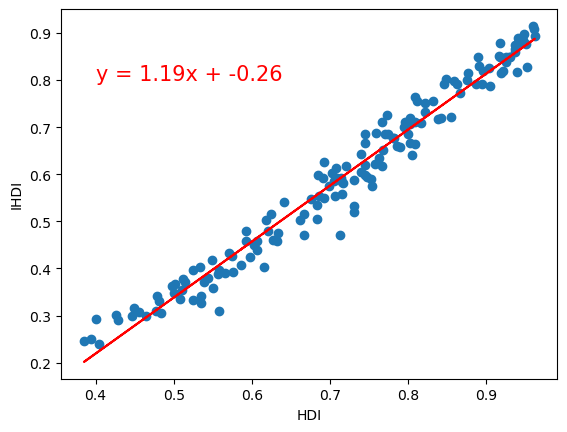

In [46]:
# Scatter Plot of HDI vs IHDI
x_values = HDI_IHDI['Human Development Index 2021']
y_values = HDI_IHDI['ihdi_2021']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.4,0.8),fontsize=15,color="red")
plt.xlabel('HDI')
plt.ylabel('IHDI')
print(f"The correlation coefficient: {rvalue}")
plt.show()

KeyError: 'Inequality in life expectancy'

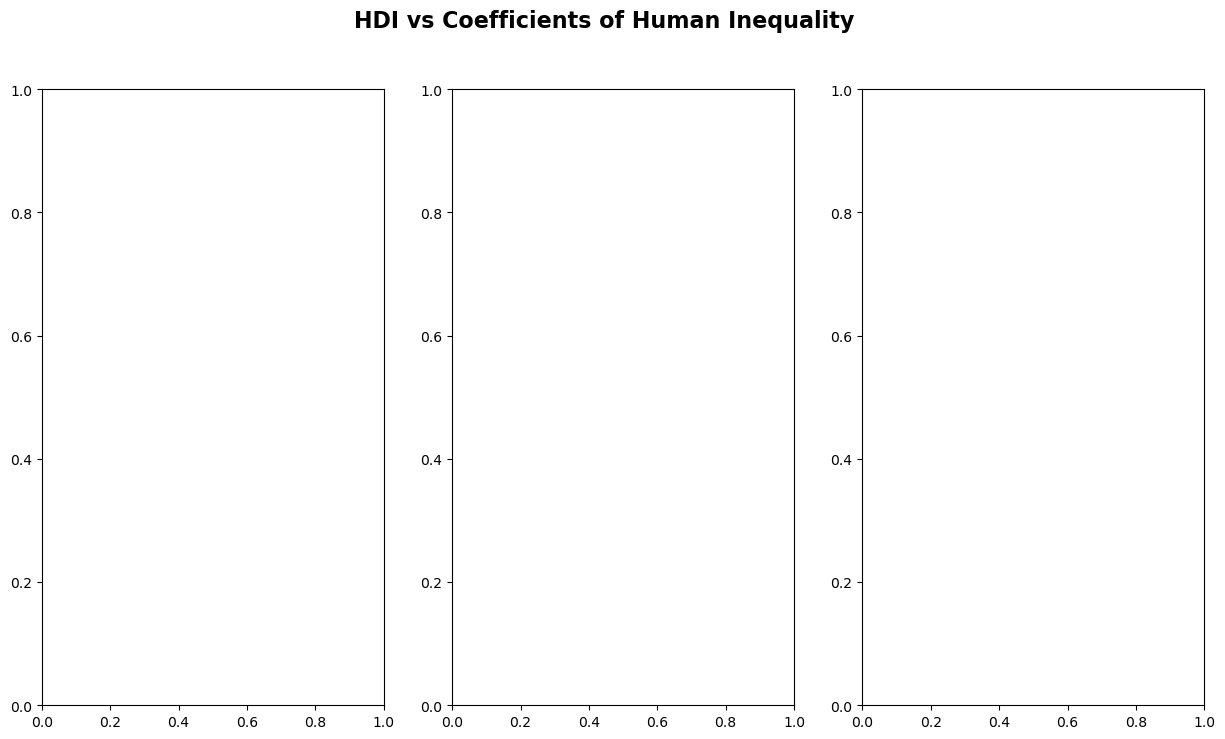

In [47]:
# Generate a facet plot for HDI vs coefficient of Human Inequality for each HDI component
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, figsize=(15,8))
fig.suptitle("HDI vs Coefficients of Human Inequality", fontsize=16, fontweight="bold")

(slope, intercept, rvalue, pvalue, stderr) = linregress(HDI_IHDI['Human Development Index 2021'], HDI_IHDI['Inequality in life expectancy'])
regress_values = HDI_IHDI['Human Development Index 2021'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax1.set_xlim(0.3, 1)
ax1.scatter(HDI_IHDI['Human Development Index 2021'], HDI_IHDI['Inequality in life expectancy'], linewidth=1, marker="o")
ax1.plot(HDI_IHDI['Human Development Index 2021'],regress_values,"r-", linewidth=1)
ax1.annotate(line_eq,(0.5,40),fontsize=15,color="red")
ax1.set_ylabel("Inequality in Life Expectancy")
ax1.set_xlabel("HDI")
print(f"The correlation coefficient for Inequality in life expectancy is: {rvalue}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(HDI_IHDI['Human Development Index 2021'], HDI_IHDI['Inequality in eduation'])
regress_values = HDI_IHDI['Human Development Index 2021'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax2.scatter(HDI_IHDI['Human Development Index 2021'], HDI_IHDI['Inequality in eduation'], linewidth=1, marker="o", color="y")
ax2.plot(HDI_IHDI['Human Development Index 2021'],regress_values,"r-", linewidth=1)
ax2.annotate(line_eq,(0.5,50),fontsize=15,color="red")
ax2.set_ylabel("Inequality in Education")
ax2.set_xlabel("HDI")
print(f"The correlation coefficient for Inequality in education is: {rvalue}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(HDI_IHDI['Human Development Index 2021'], HDI_IHDI['Inequality in income'])
regress_values = HDI_IHDI['Human Development Index 2021'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax3.scatter(HDI_IHDI['Human Development Index 2021'], HDI_IHDI['Inequality in income'], linewidth=1, marker="o", color="g")
ax3.plot(HDI_IHDI['Human Development Index 2021'],regress_values,"r-", linewidth=1)
ax3.annotate(line_eq,(0.55,50),fontsize=15,color="red")
ax3.set_ylabel("Inequality in Income")
ax3.set_xlabel("HDI")
print(f"The correlation coefficient for Inequality in income is: {rvalue}") 

plt.show()